In [1]:
import yt
import numpy as np
from yt.visualization.base_plot_types import get_multi_plot
import matplotlib.colorbar as cb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
plt.rcParams['font.size']=30
plt.rcParams['axes.linewidth']=2.5
plt.rcParams['xtick.major.size']=15
plt.rcParams['xtick.minor.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'


In [3]:
base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Data/"
folder   = ["HR_0821_1e-6_SFR3/", "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/" ]


filename = ["DD0300/sb_0300", "DD0130/sb_0130"]

# run_name =[ r'n1e-6$\Sigma$3M$_{\odot}$' , r'n6e-5$\Sigma$10M$_{\odot}$']
run_name =[ r'SFR3' , r'SFR10']
mp = 1.67e-24
pc = 3.018e18
kpc = 1.e3*pc


In [4]:
num = len(folder)
bins = 512
slc_xray = np.zeros((num, bins, bins))

for i in range(num):
    file_loc     = base + folder[i] + filename[i] 
    ds           = yt.load(file_loc)
    xray_fields  = yt.add_xray_emissivity_field(ds, 0.5, 2, redshift=0.002, metallicity = ("gas", "metallicity"))


    slc      = yt.ProjectionPlot(ds, 'x', fields=["xray_intensity_0.5_2_keV"])
    slc_frb  = slc.data_source.to_frb((100.0, "kpc"), bins)
    
    slc_xray[i,:] = np.array(slc_frb['xray_intensity_0.5_2_keV'])

yt : [INFO     ] 2020-06-01 14:11:49,943 Parameters: current_time              = 3000.0001595029
yt : [INFO     ] 2020-06-01 14:11:49,945 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-06-01 14:11:49,946 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2020-06-01 14:11:49,947 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2020-06-01 14:11:49,948 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 7986.68it/s]
yt : [INFO     ] 2020-06-01 14:11:50,035 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 14:11:51,823 Loading emissivity data from ./cloudy_emissivity_v2.h5.
yt : [INFO     ] 2020-06-01 14:11:51,937 X-ray emissivity data calculated with Cloudy 13 rc1 on 12/10/2012 by Britton Smith.
yt : [INFO     ] 2020-06-01 14:11:51,939 X-ray 'cloudy' emissivity data version: 2.
yt : [INFO     ] 2020-06-01 14:11:52,086 Adding xray_emissivity_0.5_

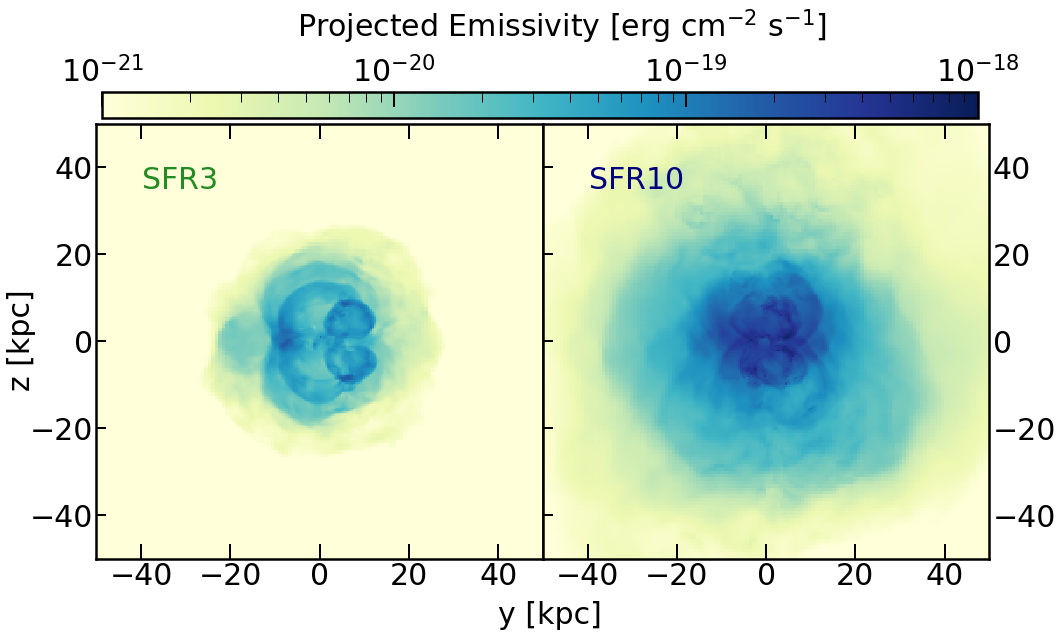

In [5]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(16,8))
cbarx = 0.13
cbheight = 0.03
cbary = 0.89
cblen = 0.19
x = np.linspace(-50.,50, bins)
y = x

for i in range(num):
    plot = ax[i].pcolormesh(x,y,slc_xray[i,:,:], norm=colors.LogNorm(vmin=1e-21, vmax=1.e-18),
                       cmap='YlGnBu')
    
    if(i==0):
        cax = f.add_axes([cbarx, cbary, 4.*cblen, 1.5*cbheight])
        f.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-21,1.e-20, 1.e-19, 1.e-18))
        cax.xaxis.set_ticks_position('top')
    ax[i].tick_params(axis='x', labelbottom=True)
    ax[i].tick_params(axis='x', top=True)
    ax[i].set_xticks((-40,-20,0,20,40))  

ax[0].text(-5., 70., r"Projected Emissivity [erg cm$^{-2}$ s$^{-1}$]")
ax[0].text(40., -65., 'y [kpc]', color = 'black')
ax[0].text(-40., 35., r'$\rm{SFR}3$', color = 'forestgreen')
ax[1].text(-40., 35., r'$\rm{SFR}10$', color = 'navy')
ax[0].text(-70., -10, 'z [kpc]', rotation = 90)
ax[1].tick_params(axis='y', labelleft=False)
ax[1].tick_params(axis='y', labelright=True)

# set(ax, {'YColor'}, {'g', 'g'})
# set(ax[0],'Color','w')
plt.savefig("projected_emissivity.jpeg", bbox_inches= 'tight', dpi=160)


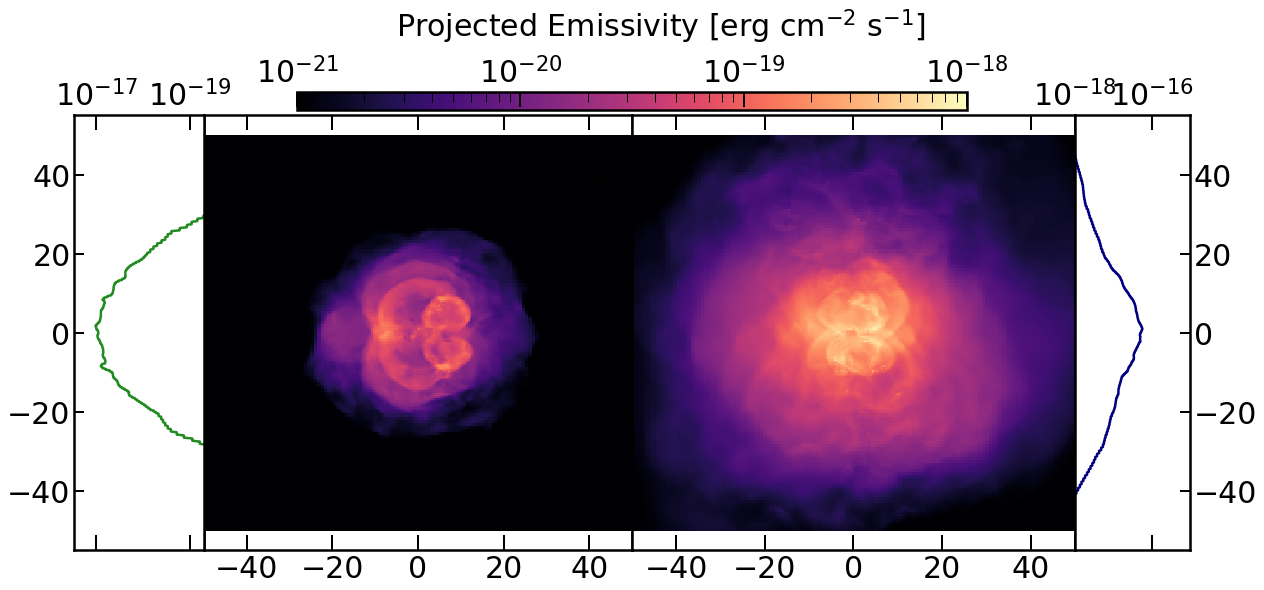

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.ticker import FixedLocator, FixedFormatter

f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(20,8))
cbarx = 0.28
cbheight = 0.02
cbary = 0.89
cblen = 0.155
x = np.linspace(-50.,50, bins)
y = x
color = ['forestgreen', 'navy']

for i in range(num):
    divider = make_axes_locatable(ax[i])
    plot = ax[i].pcolormesh(x,y,slc_xray[i,:,:], norm=colors.LogNorm(vmin=1e-21, vmax=1.e-18),
                       cmap='magma')
    if(i==0):
        axHisty = divider.append_axes("left", size=1.8, pad=0, sharey=ax[i])
    else:
        axHisty = divider.append_axes("right", size=1.6, pad=0, sharey=ax[i])
        
    axHisty.plot(np.sum(slc_xray[i],axis=1),y, '-', color = color[i], lw=2.5)
    axHisty.set_xscale('log')
    axHisty.tick_params(axis='y', which='minor', left=False, right=True)
    if(i==0):
        axHisty.set_xlim(3.e-17,5.e-20)
        axHisty.set_xticks([1.e-17, 1.e-19])
    if(i==1):
        axHisty.set_xlim(1.e-15,1.e-18)
        axHisty.set_xticks([1.e-16, 1.e-18])
        
    axHisty.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False, labeltop=True)
    
    if(i==0):
        axHisty = plt.gca()
        plt.gca().invert_xaxis()
        cax = f.add_axes([cbarx, cbary, 3.*cblen, 1.5*cbheight])
        f.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-21,1.e-20, 1.e-19, 1.e-18))
        cax.xaxis.set_ticks_position('top')
        
    if(i==1):
        axHisty.tick_params(axis='y', which = 'both', left=False, right=True, labelright=True, labelleft=False)
        axHisty.set_yticks([-40,-20,0,20,40])
        
    ax[i].tick_params(axis='x', labelbottom=True)
    ax[i].tick_params(axis='x', top=True)
    ax[i].set_xticks((-40,-20,0,20,40))  
    
ax[1].tick_params(axis='y', which = 'both', left=False, right=False, labelright=False)
ax[0].text(-5., 75., r"Projected Emissivity [erg cm$^{-2}$ s$^{-1}$]")
# ax[1].tick_params(axis='y', labelleft=False)
# ax[1].tick_params(axis='y', labelright=True)
plt.savefig("projected_emissivity_with-zprofile.pdf", bbox_inches= 'tight', dpi=160)

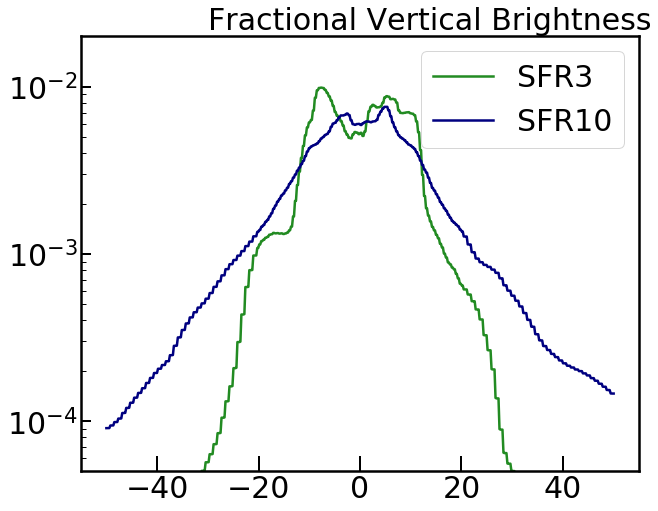

In [7]:
z_profile = np.sum(slc_xray, axis = 1)
x = np.linspace(-50.,50, bins)
y = x


f, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(10,8))
for i in range(2):
    ax.plot(y, z_profile[i]/np.sum(z_profile[i]), color=color[i], lw=2.5, label=run_name[i])
    
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_ylim(5.e-5, 2.e-2)
ax.text(-30, 2.2e-2,'Fractional Vertical Brightness')
plt.savefig("zprofile.pdf", bbox_inches= 'tight', dpi=160)

In [8]:
base    = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Data/"
folder   = ["HR_0821_1e-6_SFR3/", "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/" ]
filename = ["DD0300/sb_0300", "DD0130/sb_0130"]
run_name =[ r'n1e-6$\Sigma$3M$_{\odot}$' , r'n6e-5$\Sigma$10M$_{\odot}$']
run = len(filename)
cby  = 0.775
x = np.zeros((run,128))
y = np.zeros((run,128))
z = np.zeros((run,128, 128))
temp = np.zeros((run,128))
dens = np.zeros((run,128))
(tlow, thigh) = (1.e5, 2.e7)
(dlow, dhigh) = (1.e-29, 1.e-25)
delta_d       = (np.log(dhigh) - np.log(dlow))/128.
delta_t       = (np.log(thigh) - np.log(tlow))/128.
extrema       = dict(density=(dlow, dhigh), temperature=(tlow,thigh))


for i in range(2):

    ds       = yt.load(base + folder[i] + filename[i])
    xray_fields  = yt.add_xray_emissivity_field(ds, 0.5, 2, redshift=0.002, metallicity = ("gas", "metallicity"))


    sp1       = ds.sphere('c',(400,'kpc'))
    cr        = sp1.cut_region(" (obj['z'].in_units('kpc')<6) & (obj['z'].in_units('kpc')>-6)\
                       & (obj['radius'].in_units('kpc')<20)  " )

    sp        = sp1 - cr

    sp050     = sp.cut_region(["(obj['radius'].in_units('kpc') <= 50.)  & \
                                (obj['radius'].in_units('kpc') > 0) "])



    profile = yt.create_profile(sp050, ['density','temperature'],
                                n_bins=[128, 128], fields=['xray_luminosity_0.5_2_keV'],
                                weight_field=None, extrema=extrema)
    x[i] = profile.x/mp
    y[i] = profile.y
    b = profile.field_data
    z[i,:,:] = b[('gas', 'xray_luminosity_0.5_2_keV')]/delta_d/delta_t


yt : [INFO     ] 2020-06-01 14:15:10,457 Parameters: current_time              = 3000.0001595029
yt : [INFO     ] 2020-06-01 14:15:10,458 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2020-06-01 14:15:10,459 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2020-06-01 14:15:10,460 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2020-06-01 14:15:10,461 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 11804.02it/s]
yt : [INFO     ] 2020-06-01 14:15:10,521 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 14:15:11,369 Loading emissivity data from ./cloudy_emissivity_v2.h5.
yt : [INFO     ] 2020-06-01 14:15:11,374 X-ray emissivity data calculated with Cloudy 13 rc1 on 12/10/2012 by Britton Smith.
yt : [INFO     ] 2020-06-01 14:15:11,376 X-ray 'cloudy' emissivity data version: 2.
yt : [INFO     ] 2020-06-01 14:15:11,420 Adding xray_emissivity_0.5

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


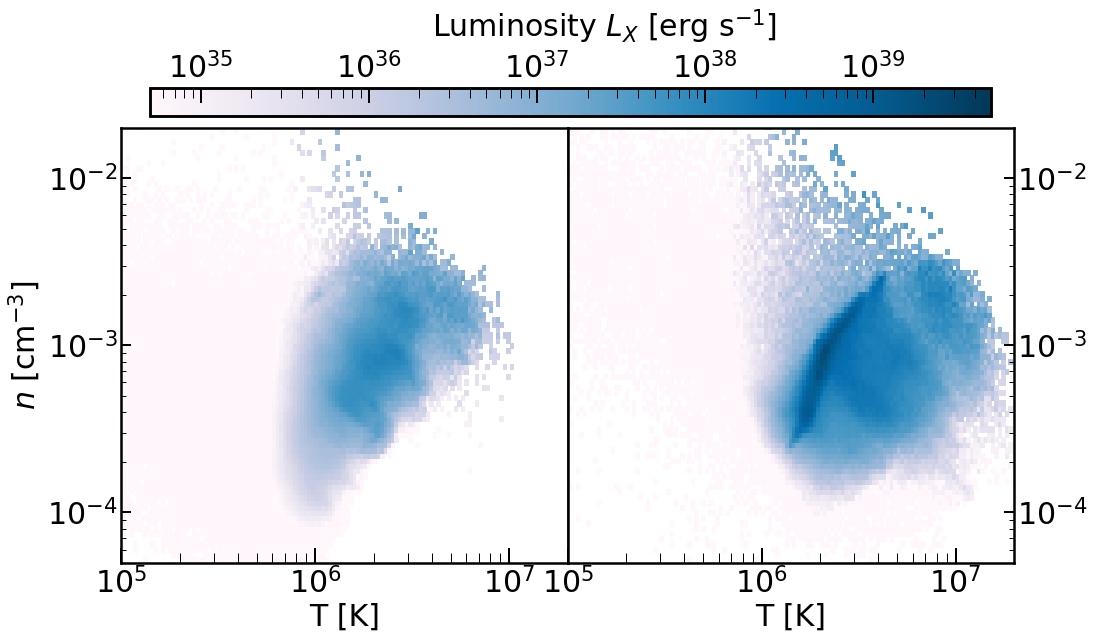

In [19]:

f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(16,8))

for i in range(2):

    plot = ax[i].pcolormesh(y[i],x[i],z[i,:,:], norm=colors.LogNorm(vmin=5.e34, vmax=5.e39),
                      cmap='PuBu')
    cax = f.add_axes([0.15, 0.90, 0.73, 0.05])
    f.colorbar(plot, cax=cax, orientation='horizontal', ticks = (1.e35, 1.e36, 1.e37,1.e38, 1.e39), aspect = 10)
    cax.xaxis.set_ticks_position('top')
    ax[0].set_ylabel(r'$n$ [cm$^{-3}$]')
    ax[i].set_xlabel(r'T [K]')

ax[1].tick_params(axis='y', which='both',left=False, right=True, labelleft=False, labelright = True)  
ax[0].text(4.e6, 7.e-2, r"Luminosity $L_X$ [erg s$^{-1}$]")

plt.setp(ax,'yscale','log')
plt.setp(ax,'xscale','log')
plt.setp(ax, 'xlim', (1.e5, 2.e7))

plt.setp(ax, 'ylim', (5.e-5, 2.e-2))
plt.savefig("luminosity_0.5-2.0keV.pdf", bbox_inches= 'tight', dpi=160)